# Heart Disease prediction

In [2]:
!pip install gradio

In [3]:
#!pip install sklearm
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inline matpotlib to view inside the notebook directly
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Gradio dependencies
import gradio as gr
import joblib

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


### Data cleaning and analysis

In [5]:
df = pd.read_csv("/content/heart.csv")
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# how many class of one feature or target
df["target"].value_counts()

,count
target,
1,165
0,138


<Axes: xlabel='target'>

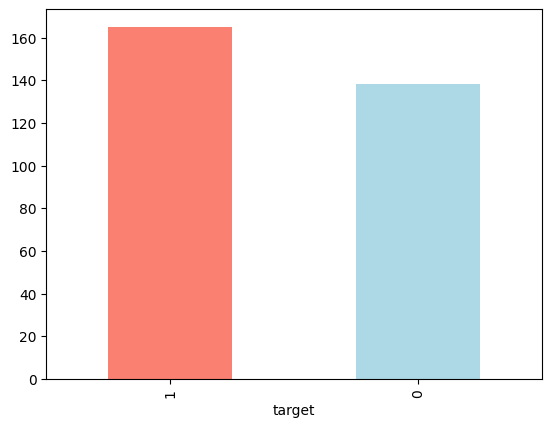

In [9]:
# Bar Chart
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploratory Data Analysis

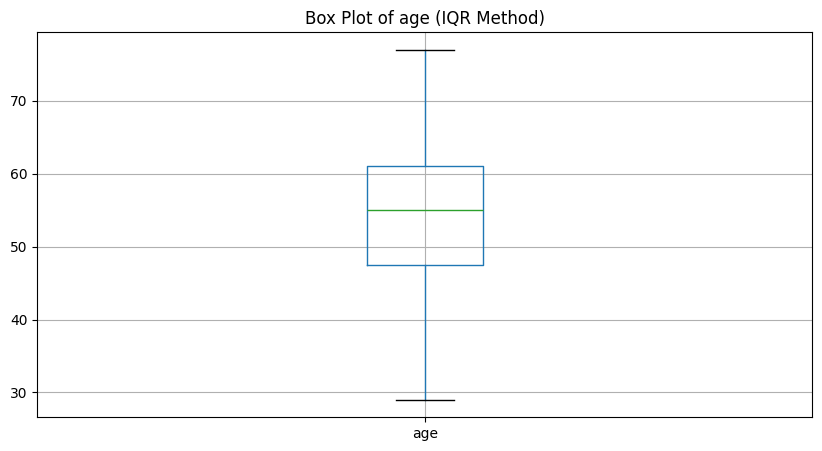

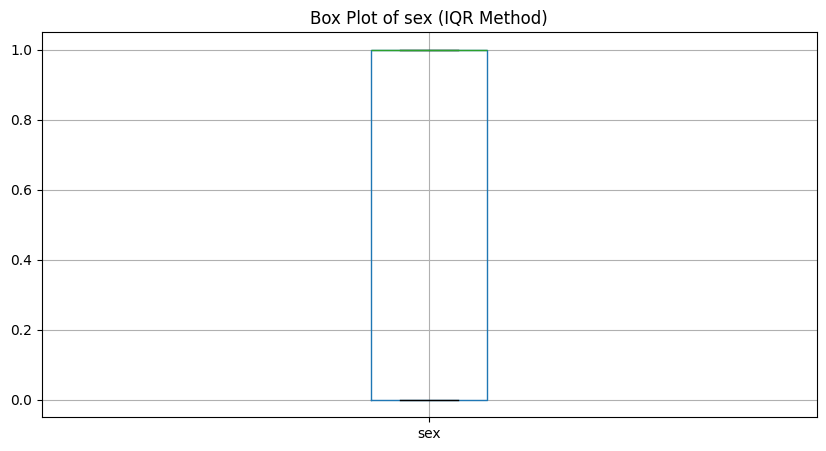

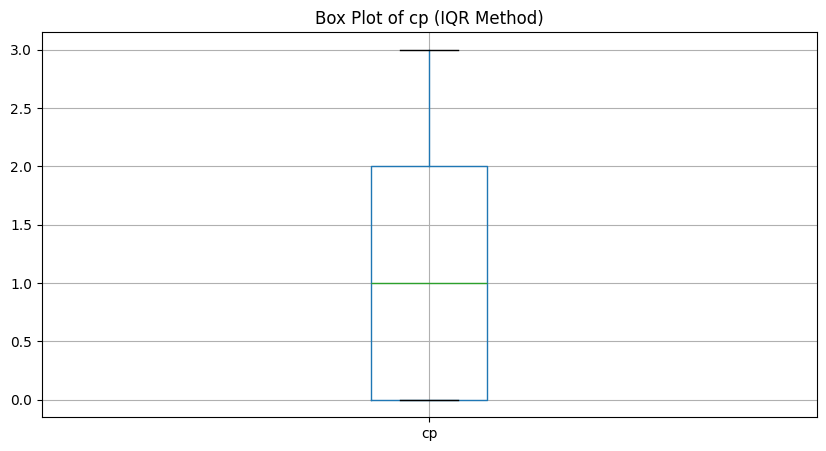

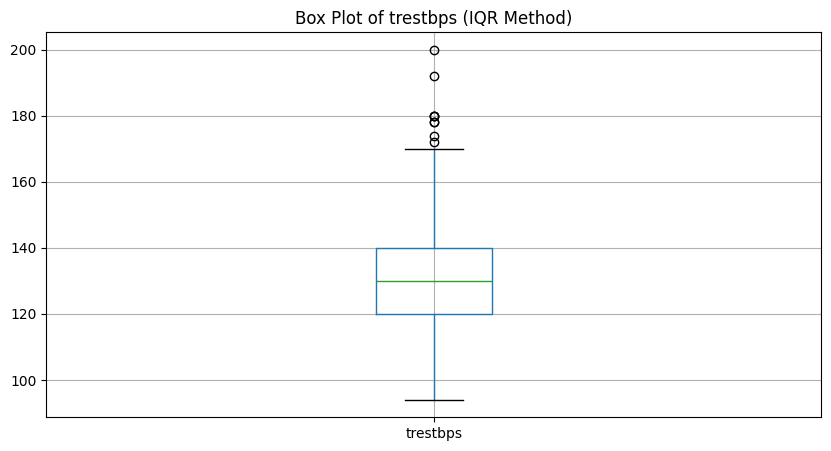

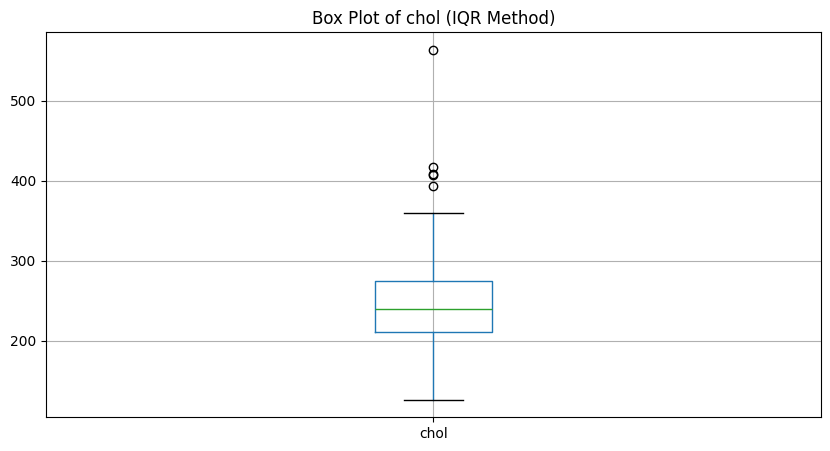

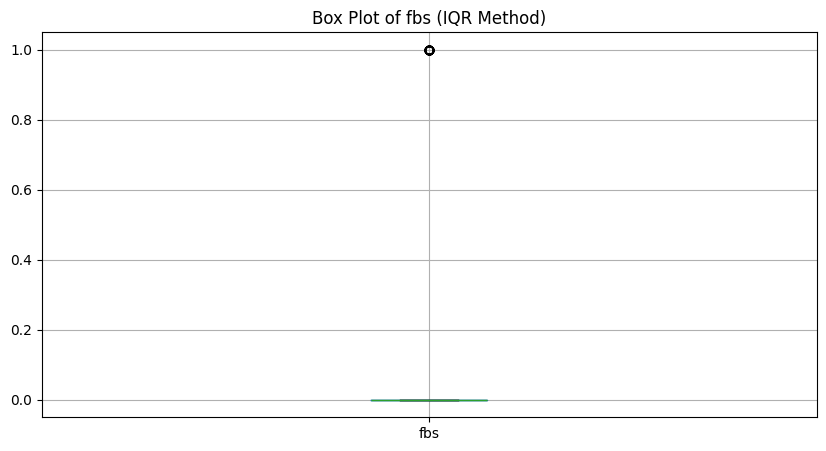

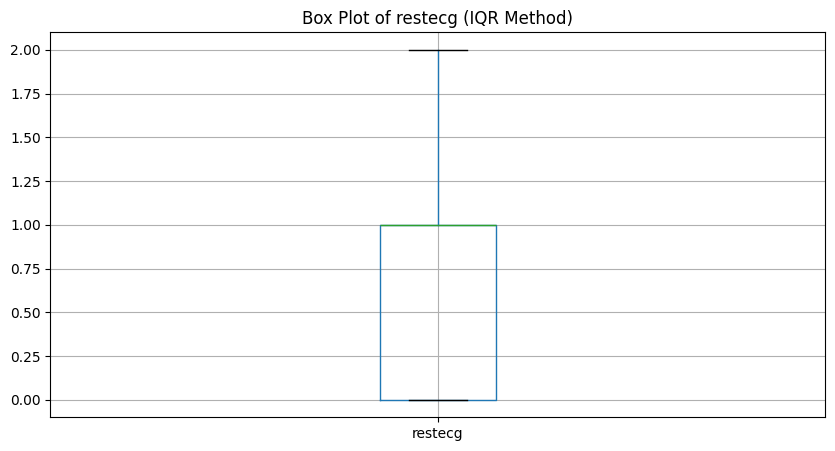

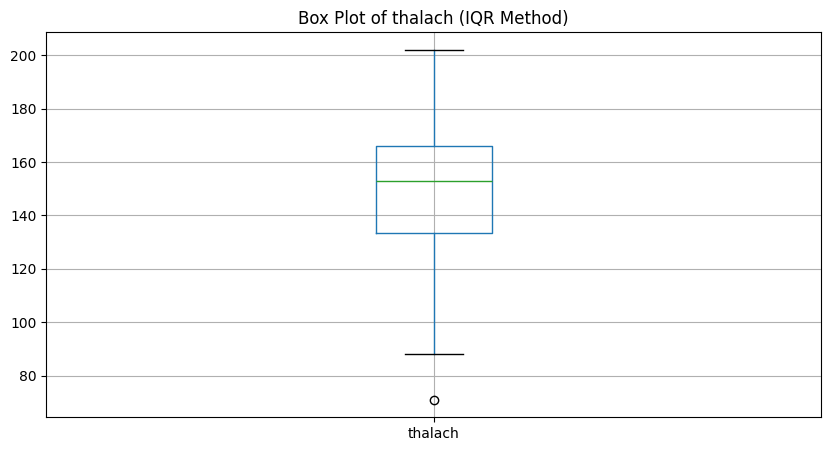

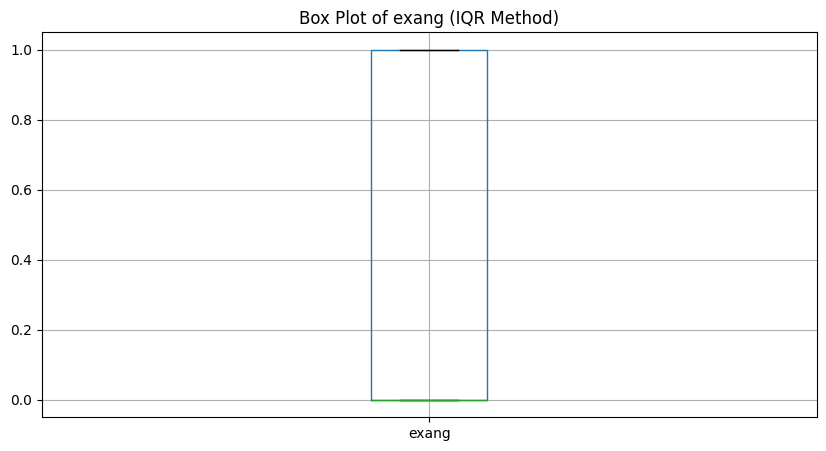

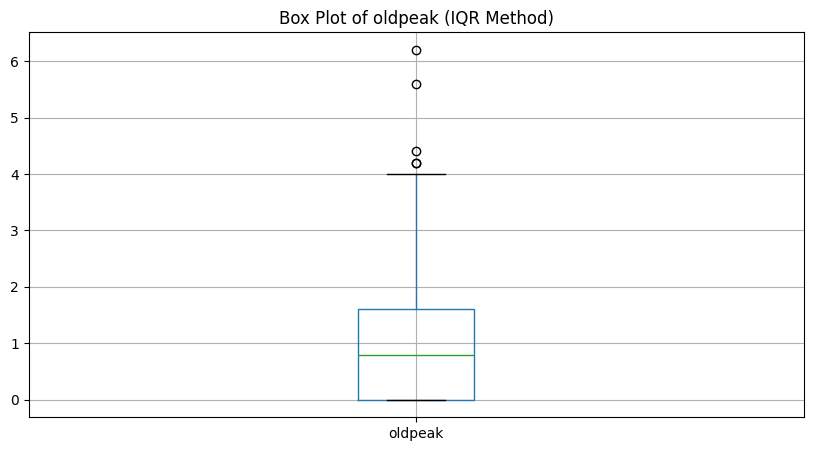

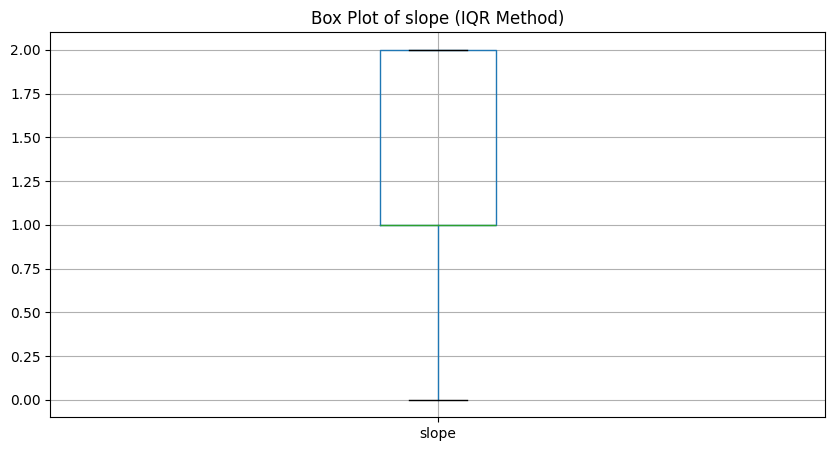

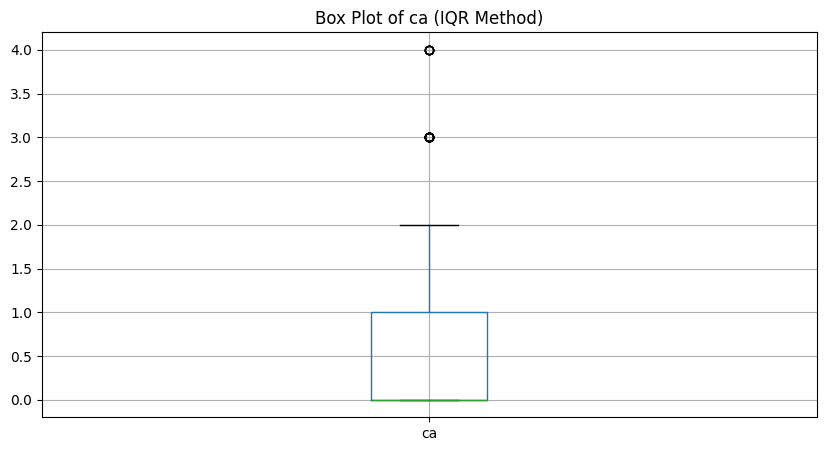

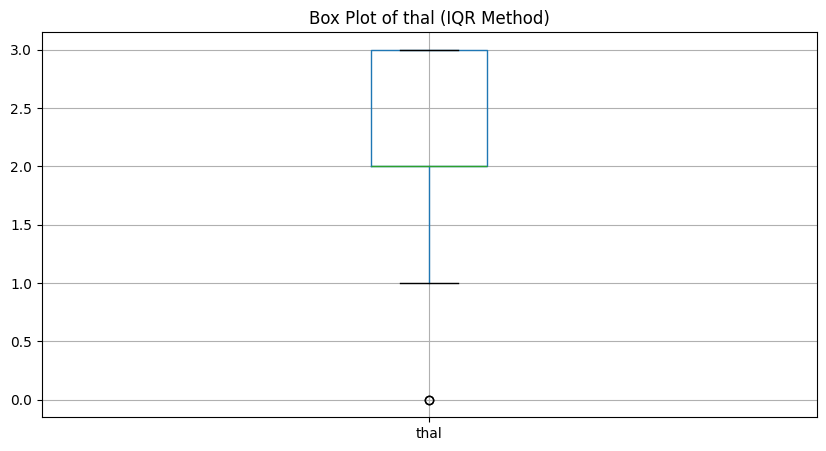

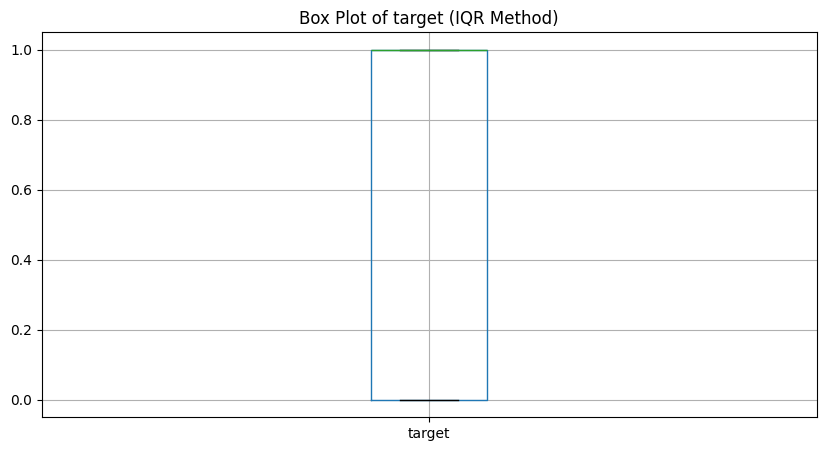

In [13]:
# Checking for outliers in individual columns
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column} (IQR Method)')
    plt.show()

In [14]:
# Dealing with outliers in the dataset
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df['tresbts'] >= lower_bound) & (df['tresbts'] <= upper_bound)]
        df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]
        df = df[(df['thalac'] >= lower_bound) & (df['thalac'] <= upper_bound)]
        df = df[(df['thalac'] >= lower_bound) & (df['thalac'] <= upper_bound)]
        df = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]
        df = df[(df['ca'] >= lower_bound) & (df['ca'] <= upper_bound)]
    return df

# Training the data

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))  # Assuming 'target' is the label
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['target'] = df['target']  # Re-attach the target column

# Split data into X and y for training features and target variable
X = df.drop("target", axis=1)
y = df["target"]

# Split dta into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2)

# Train base models
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  # Set random seed
  np.random.seed(42)
  # Dictionary to keep the model scores
  model_scores = {}
  # Loop through the models
  for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    # Evaluate Model and append score
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [22]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Figure size 1000x500 with 0 Axes>

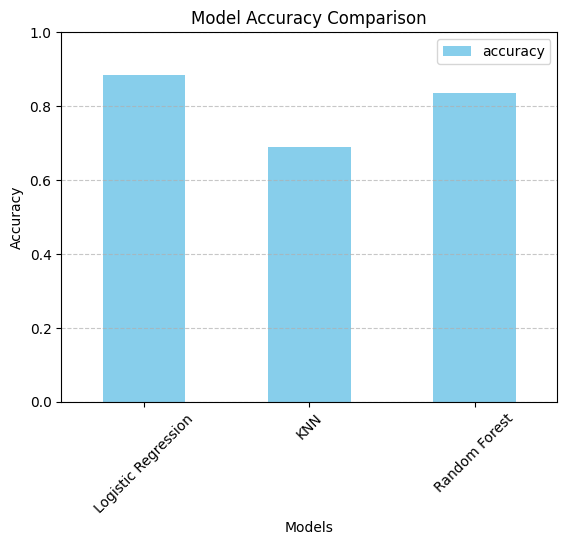

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
# Plotting the model scores
plt.figure(figsize=(10, 5))
model_compare.T.plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gradient Boosting Model

**3**. Building the Gradient Boosting Model

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_scaled
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#Accuracy: How often is the model correct in its predictions?
#Precision: How often is the model correct when it predicts a positive case (heart disease)?
#Recall: How often does the model correctly identify positive cases?
#F1-score: A balance between precision and recall.


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Confusion Matrix:
 [[29  0]
 [ 0 32]]


4. Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Tuned Model Accuracy: 1.0


5. Deploying the Model

In [27]:
import joblib

# Save the model
joblib.dump(best_model, 'gradient_boosting_model.pkl')

# Load the model for future use
loaded_model = joblib.load('gradient_boosting_model.pkl')

### Deploying the model

In [28]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):

  # Create an array of the input features
  input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

  # Make the prediction
  prediction = loaded_model.predict(input_data)

  # Return the prediction
  if prediction[0] == 0:
    return "The person does not have heart disease"
  else:
    return "The person has heart disease"


In [29]:
def process_input(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    if sex == "Male":
        sex = 1
    else:
        sex = 0

    if fbs == ">120mg/dL":
        fbs = 1
    else:
        fbs = 0

    if cp == "Typical angina":
        cp = 0
    elif cp == "Atypical angina":
        cp = 1
    elif cp == "Non-anginal pain":
        cp = 2
    elif cp == "Asymptomatic":
        cp = 3

    if exang == "Exercise Induced angina":
        exang = 1
    else:
        exang = 0

    if slope == "Upsloping":
        slope = 0
    elif slope == "Flat":
        slope = 1
    elif slope == "Downsloping":
        slope = 2

    if thal == "Normal":
        thal = 0
    elif thal == "Fixed Defect":
        thal = 1
    else:
        thal = 2

    if restecg == "Normal":
        restecg = 0
    elif restecg == "ST-T Wave Abnormality":
        restecg = 1
    else:
        restecg = 2

    predicted_class = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
    print(predicted_class)
    return predicted_class

In [30]:
def create_gradio_ui():
        inputs = [
        gr.Number(label="Age"),
        gr.Radio(choices=["Male", "Female"], label="Sex", type="value"),
        gr.Radio(choices=["Typical angina","Atypical angina","Non-anginal pain","Asymtomatic"], label="Chest Pain", type="value"),
        gr.Number(label="Resting Blood Pressure"),
        gr.Number(label="Cholesterol"),
        gr.Radio(choices=["FBS > 120", "FBS <= 120"], label="Fasting Blood Sugar", type="value"),
        gr.Radio(choices=["Normal", "Having ST-T wave abnormality" ,"Showing probable or definite left ventricular hypertrophy by Estats' criteria"], label="Rest ECG", type="value"),
        gr.Number(label="Thalach"),
        gr.Radio(choices=["Yes ", "No"], label="Exercise induced angina ", type="value"),
        gr.Number(label="Old Peak "),
        gr.Radio(choices=["Upsloping", "Flat","Downsloping"], label="Slope of peak exercise ST segment ", type="value"),
        gr.Radio(choices=[0,1,2,3], label="Number of major vessels coloured by fluoroscopy", type="value"),
        gr.Radio(choices=["Normal","Fixed Defect","Reversible Defect"], label="Thalassemia", type="value"),
    ]

In [31]:
import numpy as np
import gradio as gr

# Dummy loaded model for demonstration purposes
# Replace with your actual model loading code
# Example: loaded_model = joblib.load("heart_disease_model.pkl")
class DummyModel:
    def predict(self, input_data):
        return [1]  # Always predicts "heart disease" for demonstration

loaded_model = DummyModel()

# Prediction function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create an array of the input features
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Make the prediction
    prediction = loaded_model.predict(input_data)

    # Return the prediction
    if prediction[0] == 0:
        return "The person does not have heart disease"
    else:
        return "The person is at risk of having heart disease"

# Processing function for input data
def process_input(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Map categorical inputs to numerical values
    sex = 1 if sex == "Male" else 0
    fbs = 1 if fbs == "FBS > 120" else 0
    cp_mapping = {
        "Typical angina": 0,
        "Atypical angina": 1,
        "Non-anginal pain": 2,
        "Asymptomatic": 3
    }
    cp = cp_mapping[cp]
    exang = 1 if exang == "Yes" else 0
    slope_mapping = {"Upsloping": 0, "Flat": 1, "Downsloping": 2}
    slope = slope_mapping[slope]
    thal_mapping = {"Normal": 0, "Fixed Defect": 1, "Reversible Defect": 2}
    thal = thal_mapping[thal]
    restecg_mapping = {
        "Normal": 0,
        "Having ST-T wave abnormality": 1,
        "Showing probable or definite left ventricular hypertrophy by Estes' criteria": 2
    }
    restecg = restecg_mapping[restecg]

    # Call the prediction function
    predicted_class = predict_heart_disease(
        age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
    )
    return predicted_class

# Function to create Gradio UI
def create_gradio_ui():
    return [
        gr.Number(label="Age"),
        gr.Radio(choices=["Male", "Female"], label="Sex", type="value"),
        gr.Radio(
            choices=["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"],
            label="Chest Pain",
            type="value"
        ),
        gr.Number(label="Resting Blood Pressure"),
        gr.Number(label="Cholesterol"),
        gr.Radio(choices=["FBS > 120", "FBS <= 120"], label="Fasting Blood Sugar", type="value"),
        gr.Radio(
            choices=[
                "Normal",
                "Having ST-T wave abnormality",
                "Showing probable or definite left ventricular hypertrophy by Estes' criteria"
            ],
            label="Rest ECG",
            type="value"
        ),
        gr.Number(label="Thalach"),
        gr.Radio(choices=["Yes", "No"], label="Exercise induced angina", type="value"),
        gr.Number(label="Old Peak"),
        gr.Radio(choices=["Upsloping", "Flat", "Downsloping"], label="Slope of peak exercise ST segment", type="value"),
        gr.Radio(choices=[0, 1, 2, 3], label="Number of major vessels colored by fluoroscopy", type="value"),
        gr.Radio(choices=["Normal", "Fixed Defect", "Reversible Defect"], label="Thalassemia", type="value"),
    ]

# Main execution
if __name__ == "__main__":
    inputs = create_gradio_ui()  # Define inputs
    output = gr.Textbox(label="Prediction Result")  # Define output

    # Create Gradio interface
    interface = gr.Interface(
        fn=process_input,  # Function to process inputs
        inputs=inputs,     # Input widgets
        outputs=output     # Output widget
    )

    # Launch the Gradio interface
    interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d161403d072a7e9286.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
